### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Attributes

* survival:	Survival     where; 0 = No, 1 = Yes
* pclass:	Ticket class    	where; 1 = 1st, 2 = 2nd, 3 = 3rd
* sex:	Sex	
* Age:	Age in years	
* sibsp:	# of siblings / spouses aboard the Titanic	
* parch:	# of parents / children aboard the Titanic	
* ticket:	Ticket number	
* fare:	Passenger fare	
* cabin:	Cabin number	
* embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### loading file

In [2]:
df = pd.read_csv(r"C:\Users\chira\Downloads\train.csv")

### viewing dataset

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Inference: Cabin column has many missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
for i in df.columns :
    print('unique values in {} : {}'.format(i,len(df[i].unique())))

unique values in PassengerId : 891
unique values in Survived : 2
unique values in Pclass : 3
unique values in Name : 891
unique values in Sex : 2
unique values in Age : 89
unique values in SibSp : 7
unique values in Parch : 7
unique values in Ticket : 681
unique values in Fare : 248
unique values in Cabin : 148
unique values in Embarked : 4


Inference: Survived,Pclass,Sex and embarked are categorical columns.

### Filtering Dataset

In [7]:
#dropping PassengerId and Cabin column
df.drop(columns=['PassengerId','Cabin'],inplace=True)

#### Basic Analysis

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
gender_survived_count= df.groupby('Sex')['Survived'].value_counts()
gender_survived_count

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

Inference:
* Female were saved more than male or female survived more in comparison to male.


#### Data visualization

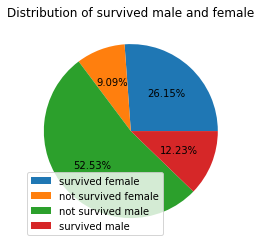

In [10]:
plt.title('Distribution of survived male and female')
plt.pie(gender_survived_count, autopct= '%0.2f%%')
plt.legend(['survived female','not survived female','not survived male','survived male']);

In [11]:
age_survived_count= df.groupby('Age')['Survived'].value_counts()
age_survived_count

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

In [12]:
kids=0
teenager=0
youth=0
working_class=0
old_age=0
for item in df.Age:
    if item<=12:
        kids+=1
    elif item>12 and item<=19:
        teenager+=1
    elif item>19 and item<=30:
        youth+=1
    elif item>30 and item<60:
        working_class+=1
    else:
        old_age+=1
        
print('Total number of kids:',kids)
print('Total number of teenagers:',teenager)
print('Total number of youths:',youth)
print('Total number of wroking class people:',working_class)
print('Total number of old age people:',old_age)

Total number of kids: 69
Total number of teenagers: 95
Total number of youths: 245
Total number of wroking class people: 279
Total number of old age people: 203


In [13]:
total_companions= df['Parch']+ df['SibSp']
total_companions

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [14]:
df['Age']=pd.cut(df['Age'],12)
df[['Age','Survived']].groupby(['Age'], as_index=False).sum().sort_values(by='Age',ascending=True)

,Age,Survived
0,"(0.34, 7.052]",34
1,"(7.052, 13.683]",8
2,"(13.683, 20.315]",40
3,"(20.315, 26.947]",48
4,"(26.947, 33.578]",60
5,"(33.578, 40.21]",45
6,"(40.21, 46.842]",17
7,"(46.842, 53.473]",22
8,"(53.473, 60.105]",11
9,"(60.105, 66.737]",4


In [15]:
age_survived_count.describe()

count    142.000000
mean       5.028169
std        4.289098
min        1.000000
25%        2.000000
50%        3.000000
75%        7.000000
max       19.000000
Name: Survived, dtype: float64